In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")

In [2]:
csvpath='/home/ubuntu/桌面/Git/Deeplearning/Python课件/5-机器学习/J老师/others/USA_Housing.csv'
USAhousing = pd.read_csv(csvpath)
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### 数据处理

In [4]:
# 判断哪些列存在数据缺失
USAhousing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
# 判断DataFrame中是否有重复的行
USAhousing.duplicated().value_counts() # 注意value_counts是函数Series的函数

False    5000
dtype: int64

In [6]:
# 仅针对数值型特征做分析 
USAhousing.describe() # 平均值与中位数相同或相似说明符合正态分布

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# 分析object类型的Address是否可以作为特征 
USAhousing.describe(include=[object]) # 显然不行，可以提取有用信息后去掉此列

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


### 可视化分析

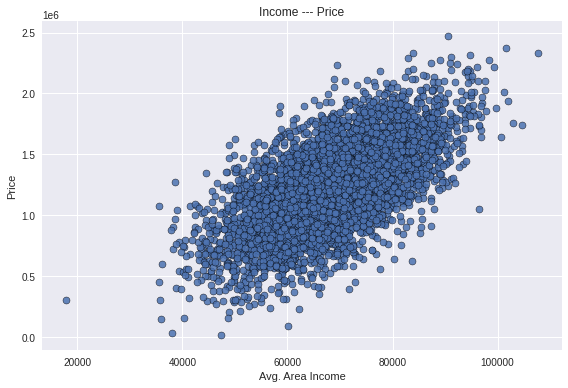

In [8]:
# income与price的关系图 散点图 判断是否存在线性关系
plt.scatter(USAhousing['Avg. Area Income'], USAhousing['Price'], edgecolors='black', linewidths=0.45, alpha=0.85)
plt.title("Income --- Price")
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.tight_layout()
# 存在线性关系

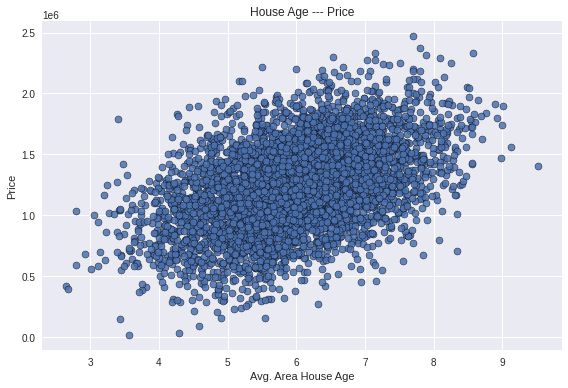

In [9]:
# house age与price的关系图 散点图 判断是否存在线性关系
plt.scatter(USAhousing['Avg. Area House Age'], USAhousing['Price'], edgecolors='black', linewidths=0.45, alpha=0.85)
plt.title("House Age --- Price")
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.tight_layout()
# 存在线性关系

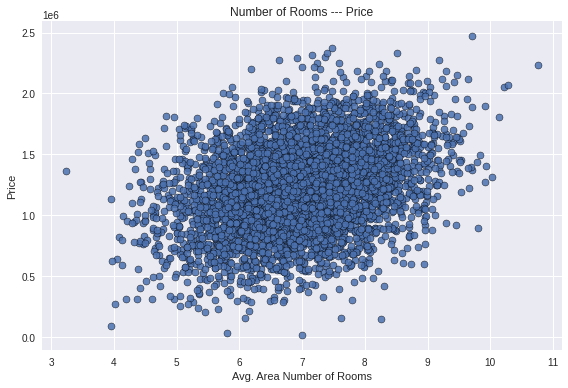

In [10]:
# number of rooms与price的关系图 散点图 判断是否存在线性关系
plt.scatter(USAhousing['Avg. Area Number of Rooms'], USAhousing['Price'], edgecolors='black', linewidths=0.45, alpha=0.85)
plt.title("Number of Rooms --- Price")
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.tight_layout()
# 存在线性关系

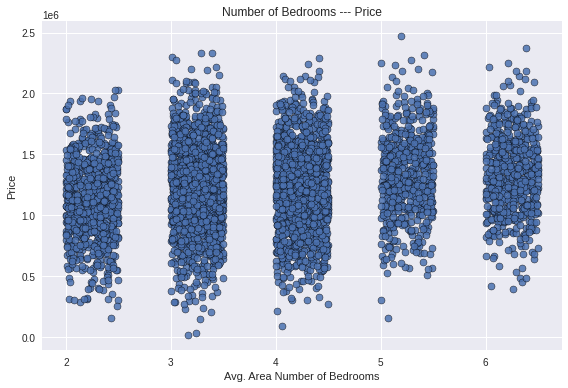

In [11]:
# number of bedrooms与price的关系图 散点图 判断是否存在线性关系
plt.scatter(USAhousing['Avg. Area Number of Bedrooms'], USAhousing['Price'], edgecolors='black', linewidths=0.45, alpha=0.85)
plt.title("Number of Bedrooms --- Price")
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
# 可能存在一定的线性关系

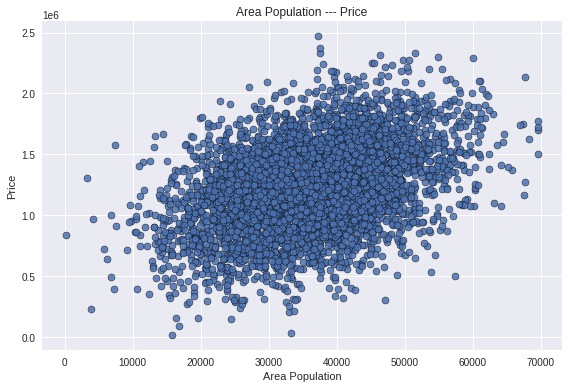

In [12]:
# number of rooms与price的关系图 散点图 判断是否存在线性关系
plt.scatter(USAhousing['Area Population'], USAhousing['Price'], edgecolors='black', linewidths=0.45, alpha=0.85)
plt.title("Area Population --- Price")
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.tight_layout()
# 存在线性关系

### 建立模型

In [13]:
# 特征筛选,去掉Address特征
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [14]:
# 分配训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# 特征缩放：数据集归一化
from sklearn.preprocessing import StandardScaler # 数据预处理类 

# 归一化方法：标准差标准化(zero-mean) 转化函数：x = (x-mean) / std 
# 经过处理后得到的数据集符合标准正态分布，即均值为0，标准差为1
# 适用于本身服从正态分布的数据

scaler = StandardScaler() 

# 下面两行代码是固定用法，不能颠倒顺序
X_train = scaler.fit_transform(X_train) # 求得 训练集 的平均值和方差并应用在 训练集 上，同时也会保存
X_test = scaler.transform(X_test)       # 用保存的 训练集 的平均值和方差来应用在 测试集 上

# 数据预处理中的方法：

# - fit(): 
# 解释：简单来说，就是求得训练集X的均值啊，方差啊，最大值啊，最小值，这些训练集X固有的属性。可以理解为一个训练过程

# - transform(): 
# 解释：在Fit的基础上，进行标准化，降维，归一化等操作（看具体用的是哪个工具，如PCA，StandardScaler等）

# - fit_transform(): 
# 解释：fit_transform是fit和transform的组合，既包括了训练又包含了转换

In [16]:
# 模型训练
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train) #fit生成权重系数coefficient

LinearRegression()

In [17]:
# 输出截距
print(lin_reg_model.intercept_)

1228219.1492415662


In [18]:
# 特征权重
coeff_df = pd.DataFrame(lin_reg_model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Area Population,151252.342377
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119


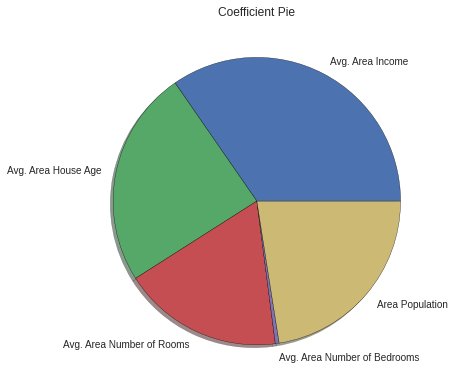

In [19]:
# 特征权重可视化
plt.pie(lin_reg_model.coef_, labels=X.columns, shadow=True, wedgeprops={'edgecolor':'black'})
plt.title("Coefficient Pie")
plt.tight_layout()

### 模型评估

In [20]:
from sklearn import metrics

# 模型评估函数
def print_evaluate(y_test, y_predict):
    mse = metrics.mean_squared_error(y_test, y_predict)  #MSE
    mae = metrics.mean_absolute_error(y_test, y_predict) #MAE
    rmse = np.sqrt(mse) #RMSE
    r2 = metrics.r2_score(y_test, y_predict) #R2 Square
    print(f'MSE:  {mse}\nRMSE: {rmse}\nMAE:  {mae}\nR2:   {r2}\n_________________________\n')
    
# 模型预测 输出评估结果
test_pred = lin_reg_model.predict(X_test)

print("测试集计算结果：\n_________________________")
print_evaluate(y_test, test_pred)

测试集计算结果：
_________________________
MSE:  10068422551.40088
RMSE: 100341.52954485436
MAE:  81135.56609336878
R2:   0.9146818498754016
_________________________



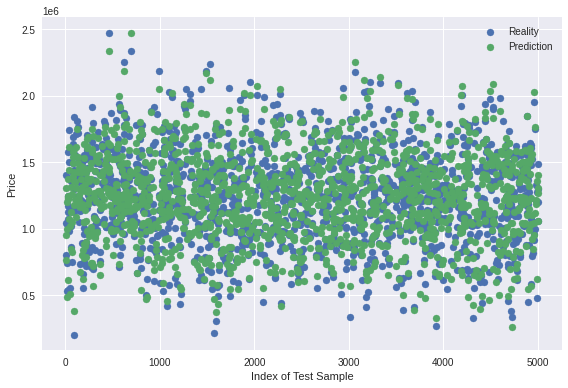

In [21]:
# 预测与真实结果可视化
plt.scatter(y_test.index, y_test, label='Reality')
plt.scatter(y_test.index, test_pred, label='Prediction')
plt.legend()
plt.xlabel('Index of Test Sample')
plt.ylabel('Price')
plt.tight_layout()

In [22]:
# 保存模型
import pickle

scalerfile = './scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb')) # 参数
pickle.dump(lin_reg_model, open('./HousingModel.pkl', 'wb')) # 模型

In [23]:
# 导入模型
# import joblib

# model = joblib.load('path')
# prediction = model.predict(X_test)